<a href="https://colab.research.google.com/github/MaximTislenko/GB_med_stat_R/blob/main/%D0%94%D0%BE%D0%BF_%D1%83%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дополнительные приемы управления данными
В главе 3 мы рассмотрели основные способы управления наборами данных в R. В этой главе мы сосредоточимся на более сложных подходах. Глава делится на три основные части. В первой части мы кратко познакомимся с многочисленными функциями, выполняющими математические и статистические вычисления, а также преобразование текстовых значений. Для придания этой части большей актуальности мы начнем с описания задачи по преобразованию данных, которую можно решить с использованием этих функций. После знакомства с функциями мы рассмотрим одно из возможных решений данной задачи.

Затем мы поговорим о том, как писать свои собственные функции для управления данными и их анализа. Сначала мы исследуем способы управления потоком выполнения инструкций с использованием циклов и условных операторов. Потом познакомимся со структурой пользовательских функций и узнаем, как их применять.

Наконец, мы рассмотрим способы агрегирования, обобщения и преобразования наборов данных. При агрегировании данных можно использовать любые встроенные или написанные пользователем функции, поэтому знания, полученные в первых двух разделах этой главы, вам действительно пригодятся.

In [1]:
library(tidyverse)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Задача по управлению данными
Прежде чем начинать обсуждение числовых и текстовых функций, определим задачу, которую затем будем решать. Группа студентов сдавала экзамены по математике, естественным наукам и английскому языку. Полученные ими баллы по трем предметам нужно объединить и получить единый показатель успеваемости для каждого студента. Кроме того, необходимо поставить оценку A первым по успеваемости 20 % студентов, оценку B – следующим по успеваемости 20 % и т. д. Наконец, список студентов нужно
отсортировать в алфавитном порядке.

\begin{array}{l|c|c|c}
Студент&Математика&Естественные~науки&Английский~язык\\\hline
John~Davis&502&95&25\\
Angela~Williams&600&99&22\\
Bullwinkie~Moose&412&80&18\\
David~Jones&358&82&15\\
Janice~Markhammer&495&75&20\\
Cheryl~Cushing&512&85&28\\
Reuven~Ytzrhak&410&80&15\\
Greg~Knox&625&95&30\\
Joel~England&573&89&27\\
Mary~Rayburn&522&86&18
\end{array}

При взгляде на эти данные сразу можно заметить несколько проблем. Во-первых, баллы, полученные на экзаменах по разным предметам, несопоставимы между собой. Их средние значения и стандартные отклонения сильно различаются, поэтому усреднять их не имеет смысла. Для вычисления единого показателя успеваемости необходимо преобразовать эти баллы так, чтобы их можно было сопоставлять между собой. Во-вторых, нам понадобится метод для определения мест студентов в общем рейтинге успеваемости, чтобы поставить им итоговую оценку. В-третьих, для нормальной сортировки студентов в алфавитном порядке нужно разбить первый столбец на два – с именем и фамилией.

Все перечисленные проблемы можно устранить с помощью числовых и текстовых функций в R. После знакомства с функциями в следующем разделе мы сможем найти подходящее решение для нашей задачи по управлению данными.


## Числовые и текстовые функции
В этом разделе перечисляются функции R, которые можно использовать для управления данными. Их можно разделить на числовые (математические, статистические, вероятностные) и текстовые. После знакомства с функциями обоих типов я покажу вам, как применять их к столбцам (переменным) и строкам (наблюдениям) таблиц данных

### Математические функции
\begin{array}{r|l}
Функция&Описание\\\hline
abs(x)&Абсолютное~значение\\
~&abs(-4)~вернет~4\\\hline
sqrt(x)&Квадратный~корень\\
~&sqrt(25)~вернет~5\\
~&То~же~самое, что~и~25**(0.5)\\\hline
ceiling(x)&Ближайшее~целое~число, не~меньшее, чем~x\\
~&ceiling(3.457)~вернет~4\\\hline
floor(x)&Ближайшее~целое~число, не~большее, чем~x\\
~&floor(3.457)~вернет~3\\\hline
trunk(x)&Целое~число, полученное~округлением~x~в~сторону~нуля\\
~&trunk(5.99)~вернет~5\\\hline
round(x,~ digits=n)&Округляет~x~до~заданного~числа~знаков~n~после~запятой\\
~&round(3.475,~digits=2)~вернет~3.48\\\hline
signif(x,~digits=n)&Округляет~x~до~заданного~числа~n~значащих~цифр\\
~&signif(3.475,~digits=2)~вернет~3.5\\\hline
cos(x), sin(x), tan(x)&Косинус, синус~и~тангенс\\
~&cos(2) вернет –0.416\\\hline
acos(x), asin(x),atan(x)&Арккосинус, арксинус~и~арктангенс\\
~&acos(-0.416)~вернет~2\\\hline
cosh(x), sinh(x), tanh(x)&Гиперболические~косинус, синус~и~тангенс\\
~&sinh(2)~вернет~3.627\\\hline
acosh(x), asinh(x), atanh(x)&Гиперболические~арккосинус, арксинус~и~арктангенс\\
~&asinh(3.627)~вернет~2\\\hline
log(x,~base=n)&Логарифм~x~по~основанию~n\\
log(x)&Для~удобства:\\
log10(x)&log(x) – натуральный~логарифм\\
~&log10(x) – десятичный логарифм\\
~&log(10)~вернет~2.3026\\
~&log10(10)~вернет~1\\\hline
exp(x)&Экспоненциальная~функция\\
~&exp(2.3026)~вернет~10\\\hline
\end{array}

В основном эти функции применяются для преобразования данных. К примеру, данные с положительно асимметричным распределением перед дальнейшей обработкой обычно логарифмируют. Математические функции также используют при реализации вычислений по формулам, создании графиков (например, кривая зависимости `x` от `sin(x)`) и форматировании числовых значений перед выводом на экран.

В таблице показаны примеры применения математических функций к скалярам (отдельным числам). Когда эти функции применяются к числовым векторам, матрицам или таблицам данных, они преобразуют каждое число отдельно. Например, `sqrt(c(4, 16, 25))` вернет вектор `c(2, 4, 5)`.

### Статистические функции

Самые распространенные статистические функции перечислены
в таблице ниже. Многие из них принимают дополнительные параметры, влияющие на результат. Например,
```
y <- mean(x)
```
вычислит среднее арифметическое по всем элементам объекта x, а
```
z <- mean(x, trim = 0.05, na.rm=TRUE)
```
вычислит усеченное среднее, исключив 5 % наибольших и 5 % наименьших значений в выборке, а также пропущенные значения. Используйте `help()`, чтобы узнать больше о каждой функции и ее аргументах.

\begin{array}{r|l}
Функция&Описание\\\hline
mean(x)&Среднее~арифметическое\\
~&mean(c(1,2,3,4))~вернет~2.5\\\hline
median(x)&Медиана\\
~&median(c(1,2,3,4))~вернет~2.5\\\hline
sd(x)&Стандартное~отклонение\\
~&sd(c(1,2,3,4))~вернет~1.29\\\hline
var(x)&Дисперсия\\
~&var(c(1,2,3,4))~вернет~1.67\\\hline
mad(x)&Абсолютное~отклонение~медианы\\
~&mad(c(1,2,3,4))~вернет~1.48\\\hline
quantile(x,~probs)&Квантили, где~x~–~числовой~вектор, для~которого~вычисляются~квантили,\\
~&а~probs~–~числовой~вектор~с~вероятностями~в~диапазоне~[0; 1]\\
~&\# 30^й~и~84^й~процентили~x\\
~&y <- quantile(x, c(.3,.84))\\\hline
range(x)&Размах~значений\\
~&x <- c(1,2,3,4)\\
~&range(x)~ вернет~ c(1,4).\\
~&diff(range(x))~ вернет~3\\\hline
sum(x)&Сумма\\
~&sum(c(1,2,3,4))~ вернет~ 10\\\hline
diff(x,~ lag=n)&Разности~между~значениями~в~выборке, взятыми~с~заданным~интервалом\\
~&lag.~По~умолчанию~интервал~равен~1.\\
~&x <- c(1,5,23,29)\\
~&diff(x)~вернет~c(4, 18, 6)\\\hline
min(x)&Минимум\\
~&min(c(1,2,3,4))~вернет~1\\\hline
max(x)&Максимум\\
~&max(c(1,2,3,4))~вернет~4\\\hline
scale(x,&Значения~объекта~x,~центрированные~(center=TRUE)~или~стандартизиро-\\
center=TRUE,&ванные~(center=TRUE,~scale=TRUE)~по~столбцам.~Пример~использования\\
scale=TRUE)&приводится~в~листинге~ниже.\\\hline
\end{array}



In [3]:
x <- c(1,2,3,4,5,6,7,8)

In [4]:
# Стеднее арифметическое
mean(x)

[1] 4.5

In [5]:
# Стандартное отклонение
sd(x)

[1] 2.44949

In [6]:
# Долгий способ
n <- length(x)
meanx <- sum(x)/n
css <- sum((x - meanx)^2)
sdx <- sqrt(css / (n-1))
meanx
sdx

[1] 4.5

[1] 2.44949

#### Стандартизация данных
По умолчанию функция `scale()` стандартизирует заданный столбец матрицы или таблицы данных так, чтобы его среднее арифметическое стало равно нулю, а стандартное отклонение – единице 1:
```
newdata <- scale(mydata)
```
Для стандартизации каждого столбца так, чтобы его среднее арифметическое и стандартное отклонение приобрели заданные значения, можно использовать примерно такой программный код:
```
newdata <- scale(mydata)*SD + M
```
где M – желаемое значение среднего арифметического, а SD – стандартного отклонения.

Применение функции `scale()` к столбцам с нечисловыми данными вызывает сообщение об ошибке. Чтобы стандартизировать определенный столбец, а не всю матрицу или таблицу данных целиком, можно использовать такой программный код:
```
newdata <- transform(mydata, myvar = scale(myvar)*10+50)
```
Этот код преобразует вектор myvar так, что его среднее арифметическое становится равным 50, а стандартное отклонение – 10. Мы будем использовать функцию scale() для решения описанной выше задачи


### Функции распределения вероятности
Вы можете задаться вопросом: почему функции распределения вероятности не были рассмотрены вместе со статистическими (это действительно странно, не правда ли?). Хотя функции распределения вероятности являются статистическими, они настолько своеобразны, что заслуживают отдельного обсуждения. Эти функции обычно используются для создания искусственных данных с известными параметрами и для вычисления вероятностей в пользовательских статистических функциях.
В программе R функции распределения вероятности имеют вид:
```
[dpqr]distribution_abbreviation()
```
где первая буква в имени обозначает параметр распределения данных:

d = плотность;

p = функция распределения;

q = функция, определяющая квантили;

r = генератор случайных отклонений.

Наиболее распространенные функции распределения вероятности перечислены в таблице ниже
\begin{array}{r|l|r|l}
Распределение&Краткое~название&Распределение&Краткое~название\\\hline
Бета&beta&Логистическое&logis\\\hline
Биноминальное&binom&Мультиноминальное&multinom\\\hline
Коши&cauchy&Отрицательное~биноминальное&nbinom\\\hline
Хи-квадрат~(ассиметричное)&chisq&Нормальное&nirm\\\hline
Экспонециальное&exp&Пуассоновское&pois\\\hline
F&f&Знаковых~рангов~Вилкоксона&signrank\\\hline
Гамма&gamma&Т&t\\\hline
Геометрическое&geom&Равномерное&unif\\\hline
Гипергеометрическое&hyper&Вейбулла&weibull\\\hline
Логнормальное&lnom&Суммы~рангов~Вилкоксона&wilcox\\\hline
\end{array}

Чтобы понять, как они работают, рассмотрим функцию нормального распределения. Если значения среднего арифметического и стандартного отклонения не указаны явно, то по умолчанию будет воспроизводиться стандартное нормальное распределение (среднее арифметическое равно 0, стандартное отклонение равно 1). Примеры функций плотности (`dnorm`), распределения (`pnorm`), квантилей (`qnorm`) и генератора случайных отклонений (`rnorm`) приведены ниже.



#### Как нарисовать кривую стандартного нормального распределения в диапазоне значений [–3, 3]

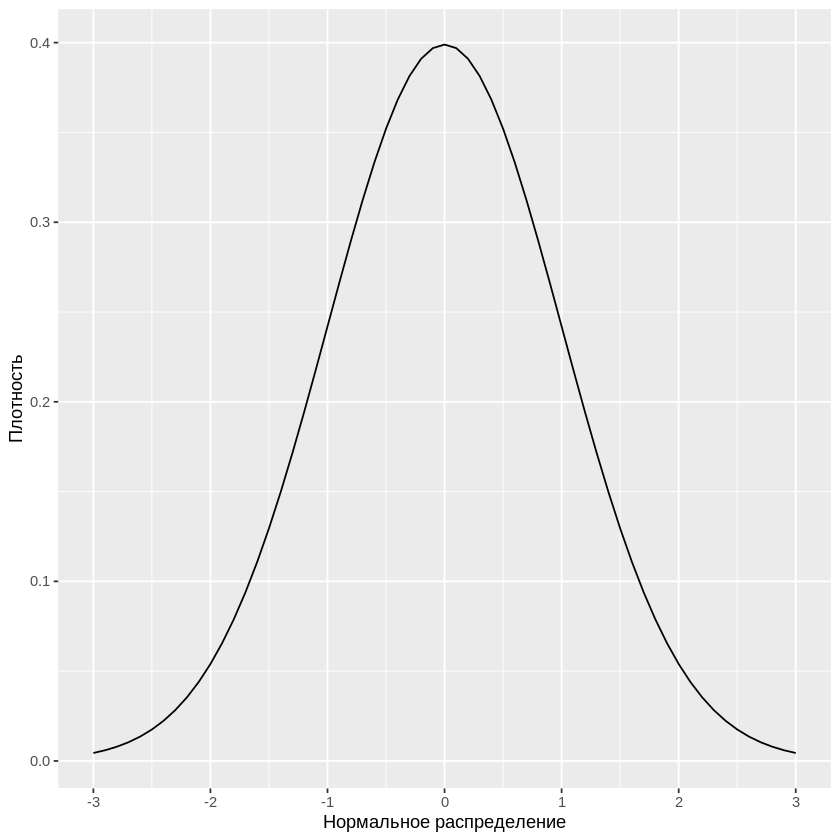

In [15]:
x <- seq(from = -3, to = 3, by = 0.1)
y <- dnorm(x)
data <- data.frame(x = x, y = y)
ggplot(data, aes(x, y))+
  geom_line() +
  labs(x = "Нормальное распределение", y = "Плотность") +
  scale_x_continuous(breaks = seq(-3, 3, 1))

#### Как определить площадь под кривой стандартного нормального распределения слева от z=1.96?

In [10]:
pnorm(1.96)

[1] 0.9750021

#### Как определить значение 90-го процентиля нормального распределения со средним значением 500 и стандартным отклонением 100?

In [11]:
qnorm(.9, mean=500, sd=100)

[1] 628.1552

#### Как создать 50 случайных чисел, принадлежащих нормальному распределению со средним значением 50 и стандартным отклонением 10?

In [12]:
rnorm(50, mean=50, sd=10)

[1] 44.97996 38.74133 68.08279 57.30392 47.84033 65.84763 42.09207 35.30027
 [9] 40.28695 51.15323 56.16952 35.46108 44.82916 52.76180 67.28218 55.69571
[17] 60.06814 38.89265 58.36445 33.94361 58.24088 60.46200 54.43848 61.10637
[25] 47.69385 42.45185 39.21862 38.77013 51.15200 67.86351 48.25267 59.10032
[33] 47.90565 48.42959 52.76491 36.74380 51.86450 45.60934 45.18129 51.83145
[41] 36.37869 42.86178 42.09965 31.38373 47.74054 40.60949 63.14047 22.03462
[49] 44.82901 58.33510

#### Выбор начального значения для генератора случайных чисел
Каждый раз, когда генерируется новая последовательность псевдослучайных чисел, используется новое начальное число, чтобы на выходе получались разные результаты. Однако, чтобы сделать результаты воспроизводимыми, можно это начальное число задать явно при помощи функции `set.seed()`, как показано ниже. Здесь используется функция `runif()`, генерирующая псевдослучайные числа, принадлежащие однородному распределению в интервале от 0 до 1.

In [16]:
runif(5)

[1] 0.03526606 0.06593874 0.18908253 0.80926016 0.99292459

In [17]:
runif(5)

[1] 0.06457671 0.34540193 0.59048070 0.59238909 0.51804306

In [18]:
set.seed(1234)
runif(5)

[1] 0.1137034 0.6222994 0.6092747 0.6233794 0.8609154

In [19]:
set.seed(1234)
runif(5)

[1] 0.1137034 0.6222994 0.6092747 0.6233794 0.8609154

#### Генерирование многомерных данных с нормальным распределением

В исследованиях с использованием искусственных данных и методов Монте-Карло часто бывает необходимо генерировать многомерные данные с нормальным распределением, соответствующие заданным вектору средних значений и ковариационной матрице. Функция `draw.d.variate.normal()` из пакета MultiRNG позволяет легко справиться с этой задачей. Эта функция имеет следующий синтаксис:
```
draw.d.variate.normal(n, nvar, mean, sigma)
```
где `n` – требуемый объем выборки, `nvar` – количество переменных, `mean` – вектор средних значений, а `sigma` – ковариационная (или корреляционная) матрица. Код ниже создаст выборку из 500 наблюдений с многомерным нормальным распределением трех переменных со следующими параметрами:
\begin{array}{l|r|r|r}
\hline
Вектор~средних~значений&230.7&146.7&3.6\\\hline
Ковариационная~матрица&15360.8&6721.2&-47.1\\
~&6721.2&4700.9&-16.5\\
~&-47.1&-16.5&0.3\\\hline
\end{array}


In [27]:
install.packages("MultiRNG")
library(MultiRNG)
options(digits=3)
# Задается случайное начальное число
set.seed(1234)
# Задаются вектор средних значений и ковариационная матрица
mean <- c(230.7, 146.7, 3.6)
sigma <- matrix(c(15360.8, 6721.2, -47.1, 6721.2, 4700.9, -16.5, -47.1, -16.5, 0.3), nrow=3, ncol=3)
# Генерирование данных
mydata <- draw.d.variate.normal(500, 3, mean, sigma)
mydata <- as.data.frame(mydata)
names(mydata) <- c("y","x1","x2")
# Вывод результатов
dim(mydata)
head(mydata, n=10)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 500   3

,y,x1,x2
,<dbl>,<dbl>,<dbl>
1,81.1,122.6,3.69
2,265.1,110.4,3.49
3,365.1,235.3,2.67
4,-60.0,14.9,4.72
5,283.9,244.8,3.88
6,293.4,163.9,2.66
7,159.5,51.5,4.03
8,163.0,137.7,3.77
9,160.7,131.0,3.59


In [22]:
sigma

15360.8,6721.2,-47.1
6721.2,4700.9,-16.5
-47.1,-16.5,0.3


Код в листинге 5.3 задает начальное число для генератора случайных чисел, чтобы потом можно было воспроизвести полученный результат. Определяет вектор средних значений и ковариационную матрицу и генерирует 500 псевдослучайных чисел. Для удобства результаты преобразованы из матрицы в таблицу данных,а переменным присвоены имена. В заключение код проверяет, действительно ли было сгенерировано 500 наблюдений по трем переменным, и выводит первые 10 наблюдений. Учтите, что поскольку корреляционная матрица также является ковариационной матрицей, вы можете напрямую задать структуру взаимосвязей (корреляций).

Пакет `MultiRNG` позволяет генерировать случайные данные из 10 многомерных распределений, включая многомерные версии распределений T, равномерного, Бернулли, гипергеометрического, мультиномиального, Лапласа, Уишарта. С помощью функций распределения вероятности можно генерировать синтетические (искусственные) данные, подчиняющиеся распределениям с известными параметрами. Число статистических методов, которые используют искусственные данные, в настоящее время лавинообразно растет, и вы увидите несколько примеров их применения в следующих главах.

### Текстовые функции
В то время как математические и статистические функции оперируют числовыми данными, текстовые функции извлекают информацию из текстовых данных или изменяют формат текстовых данных для вывода на экран и составления отчетов. Например, вам может понадобиться объединить имя и фамилию человека в одной ячейке таблицы и гарантировать, что они начинаются с прописных букв. Некоторые из наиболее часто используемых текстовых функций перечислены в таблице ниже.

\begin{array}{l|l}
\hline
nchar(x)&Подсчитывает~число~элементов~в~x.\\
~&x <- c("ab", "cde", "fghij")\\
~&nchar(x[3]) вернет 5\\\hline
substr(x, start, stop)&Извлекает~или~замещает~часть~текстового~вектора.\\
~&x <- "abcdef"\\
~&substr(x, 2, 4)~вернет~"bcd".\\
~&substr(x, 2, 4) <- "22222"\\
~&(x~теперь~содержит~текст~"a222ef")\\\hline
grep(pattern, x,&Ищет~совпадения~с~шаблоном~pattern~в~x.~ Если~fixed=FALSE,~то\\
ignore.case=FALSE, fixed=FALSE)&pattern~интерпретируется~ как~регулярное~выражение.~Если\\
~&fixed=TRUE,~то~pattern~интерпретируется~как~простая~текст-\\
~&овая~строка.~Возвращает~индексы~найденных совпадений.\\
~&grep("A",~c("b","A","c"),~fixed=TRUE)~вернет~2\\\hline
sub(pattern, replacement, x,&Ище~совпадения~с~шаблоном~pattern~в~x~и~замещает~най-\\
ignore.case=FALSE, fixed=FALSE)&
денное~совпадение~текстом~replacement.~Если~fixed=FALSE,~то\\
~&pattern~интерпретируется~как~регулярное выражение.~Если\\
~&fixed=TRUE,~то~pattern~интерпретируется~как~простая~тексто-\\
~&вая~строка.\\
~&sub("\~\s",".","Hello There")~вернет~Hello.There.~Обратите\\
~&внимание,~что "\s"~–~это~регулярное~выражение,~совпада-\\
~&ющее~с~пробелами;~здесь~используется~"\~\s",~потому~что\\
~&обратный~слеш~"\"~в~R~–~это~экранирующий~символ\\\hline
~&~\\\hline
~&~\\\hline
~&~\\\hline
~&~\\\hline
~&~\\\hline
~&~\\\hline
~&~\\\hline
~&~\\\hline
~&~\\\hline
~&~\\\hline
~&~\\\hline
\end{array}

#P.n. 147